# Power production project
###### Fundamentals of data analysis
###### Jonathan Harper
###### [1] How wind turbines work ; https://www.energy.gov/maps/how-does-wind-turbine-work
###### [2] Inside a wind turbine ; https://www.energy.gov/eere/wind/inside-wind-turbine
###### [3] How to insert an image into a Jupyter notebook ; https://findanyanswer.com/how-do-i-add-an-image-to-a-jupyter-notebook
###### [4] Polynomial regression ;https://www.kaggle.com/alexeymorozov/polynomial-regression
###### [5] Ploynomial regrsssion using NumPy; taken from class notes
###### [6] Co-efficient of determination; https://en.wikipedia.org/wiki/Coefficient_of_determination
###### [7] Shape of matrix;https://www.w3schools.com/python/numpy_array_shape.asp
###### [8] Obtaining intercept for SKlearn model;https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

##### Aim:- To examine the relationship between wind speed and power output with respect to a wind turbine.

##### Background:- It's worth understanding a little about the engineering that sits behind the task.
> Wind energy contains kinetic energy, the principle behind a wind turbine is that the kinetic energy performs work via a system of shafts and gears (low to high). This work spins a generator to induce an electrical current.

> Note the turbine also has an anonometer that provides windspeed information to the controller, this feature ensures that the turbines stop operation during periods of high winds that might damage the equipment. The turbine also has control features for pitch (position blades to the wind), brake (for emergency stops), wind vane(for positioning the turbine to the wind).

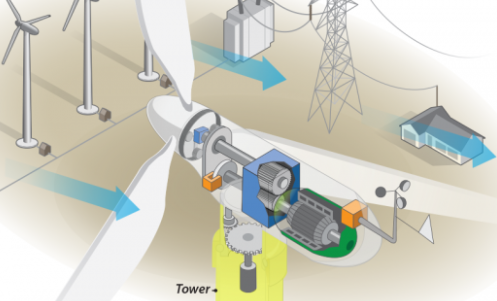

<em>image 1 basic cut through of a wind turbine<em/>
    
> For the purposes of our analysis we will not focus on the mechanical performance of the turbine (although this could affect our data) and focus solely on the relationship between observed windspeed and power output.

##### Getting started
> Firstly I will ensure that the data is imported and check this by producing visual output of the data.

In [29]:
#import data
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
print (df)

      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]


In [30]:
#check the data
print (df.describe())

            speed       power
count  500.000000  500.000000
mean    12.590398   48.014584
std      7.224991   41.614572
min      0.000000    0.000000
25%      6.324750    5.288000
50%     12.550500   41.645500
75%     18.775250   93.537000
max     25.000000  113.556000


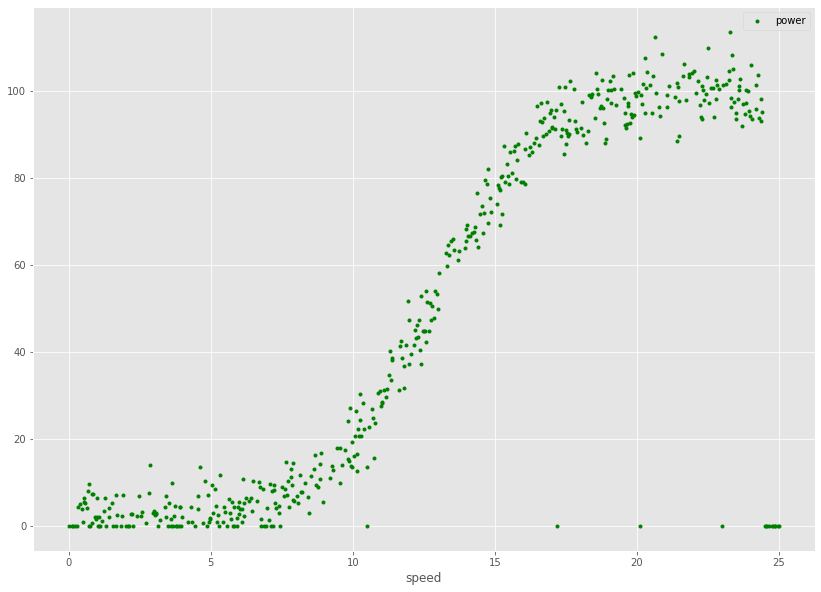

In [31]:
#Look at raw data
import matplotlib.pyplot as plt
x = 'speed'
y = 'power'
df.plot(x,y,color='green',linestyle ='none', marker='.')
plt.show()

The basic analysis shows us that the data set appears to be correctly imported and the output is generally as we expected in that as wind speed increases the power output increases with some anomalies.

From approximatly 8m/s - 18m/s the power output follows a relationship closer to the basic relationship we might anticipate - as wind speed increases the power output measured increases.

From approximately 18m/s onwards the relationship between power output and speed changes again, with little extra return in power for increased speed. Indeed at the highest speeds the power output is zero leading to the conclusion that the turbine was not operational at the very highest wind speed.

However it is also noted that there are a number of data points in which the power output is zero when we would expect there to be a non zero output. These points would also indicate that the turbine was non operational or power output was interrupted.

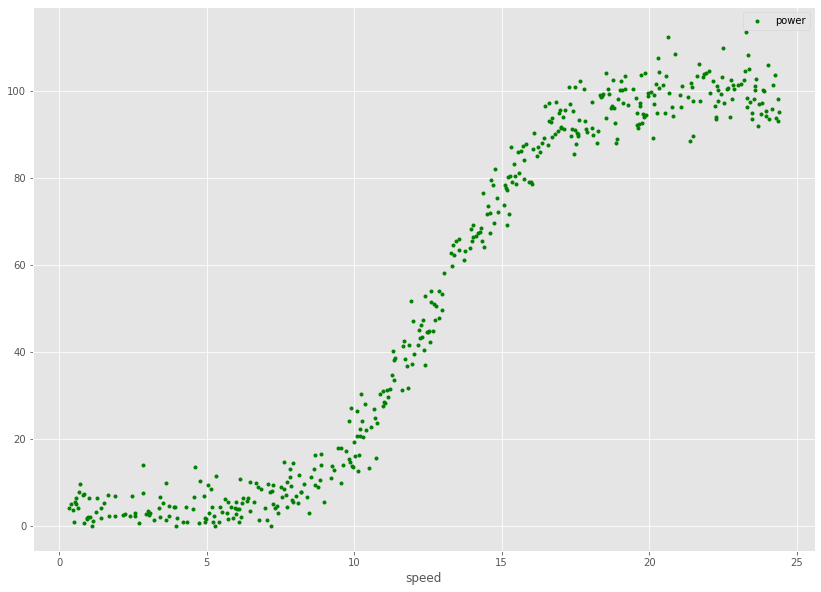

In [32]:
#Remove 0 power points from data
df = df.loc[df.loc[:,'power']>0]
x = 'speed'
y = 'power'
df.plot(x,y,color='green',linestyle ='none', marker='.')
plt.show()

In [33]:
# Check new data set
df

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [34]:
df.loc[:,"power"]

5        4.331
6        5.186
7        3.826
8        1.048
9        5.553
        ...   
485    103.700
486     93.694
487     93.078
488     98.223
489     95.117
Name: power, Length: 451, dtype: float64

In [35]:
(df.describe())

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


###### We can see that the data clean up has removed 49 rows of data in which the power output was 0

### Linear Regression using sklearn test train split

Coefficients: 
 [[5.77639303]]
Mean squared error: 168.56
Coefficient of determination: 0.90


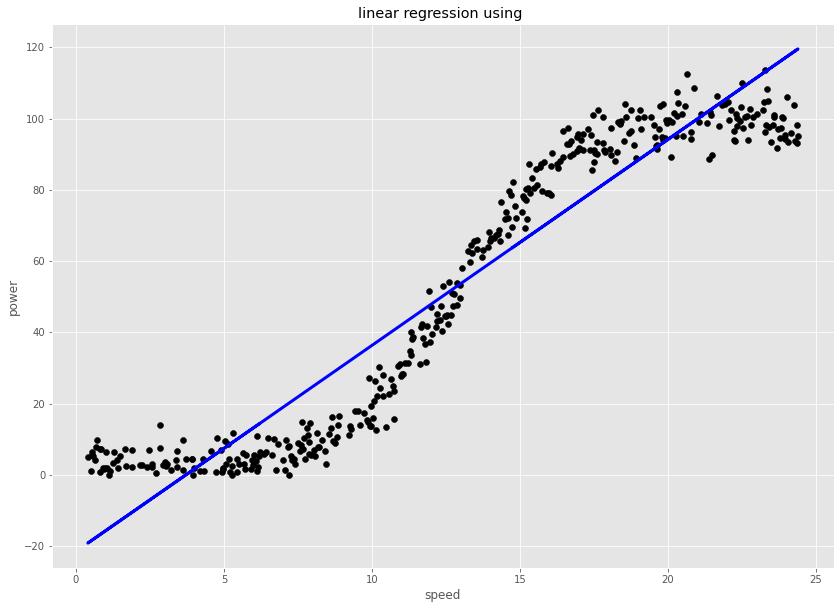

In [36]:
#Just to obtain first look using exisiting knowledge of SKlearn to 'predict' linear model. 
# Parameters defined here to be used through the sheet e.g X and y, a and b
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

a = df.loc[:,"speed"]
b = df.loc[:,"power"]
X = np.array(a).reshape(-1,1)# creating arrays for use in model
y = np.array(b).reshape(-1,1)# creating arrays for use in model
#print(x)#used to check arrays working
#print(y)#used to check arrays working
 

# Use only one feature
X = X [:,np.newaxis,0]


# Split the data into training/testing sets
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(X, y, train_size= 50, test_size= 401)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df_X_train, df_y_train)

# Make predictions using the testing set
df_y_pred1 = regr.predict(df_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(df_y_test, df_y_pred1))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(df_y_test, df_y_pred1))

# Plot outputs
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=14,10
plt.scatter(df_X_test, df_y_test,  color='black')
plt.plot(df_X_test, df_y_pred1, color='blue', linewidth=3)
plt.xlabel('speed')
plt.ylabel('power')
plt.title('linear regression using ')

plt.xticks()
plt.yticks()

plt.show()

### Full polynomial Regression using sklearn

Coefficients =  [[-19.83768545   5.61882784]]
Coefficient of determination: 0.90
Mean squared error: 166.32


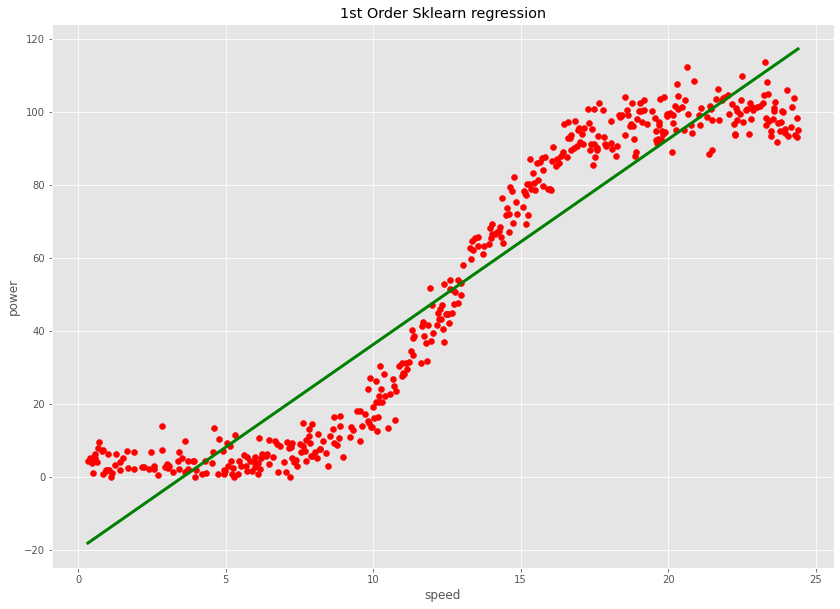

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

a = df.loc[:,"speed"]
b = df.loc[:,"power"]
X = np.array(a).reshape(-1,1)# creating arrays for use in model
y = np.array(b).reshape(-1,1)# creating arrays for use in model 

# Use only one feature
X = X [:,np.newaxis,0]

poly_reg = PolynomialFeatures(degree=1)
X_poly = poly_reg.fit_transform(X)
pol_reg = linear_model.LinearRegression(fit_intercept=False)
pol_reg.fit(X_poly, y)
print('Coefficients = ', pol_reg.coef_)
y_pred = pol_reg.predict(poly_reg.fit_transform(X))
r2 = r2_score(y,y_pred)
print('Coefficient of determination: %.2f'% r2)
print('Mean squared error: %.2f'
      % mean_squared_error(y,y_pred))

# Plot outputs
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=14,10
plt.scatter(X, y, color='red')
plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='green', linewidth=3)
plt.xlabel('speed')
plt.ylabel('power')
plt.title('1st Order Sklearn regression')
plt.xticks()
plt.yticks()
plt.show()
# Following is purely a note to self, appologies : Jonathan
# intersting to note here how accurate the modeling got us with 50 data points as opposed to the full set here
# 20 points gave a gradient of 5.08546361 
# 10 points gave a gradient of 5.79001016
# sklearn can be used very powerfully on limited amounts of data (could run multile times for average?)

Coefficients =  [[-2.82537457e+00  1.11555430e+01 -4.10498046e+00  5.36469779e-01
  -2.52362917e-02  3.96301722e-04]]
Coefficient of determination: 0.99
Mean squared error: 19.70


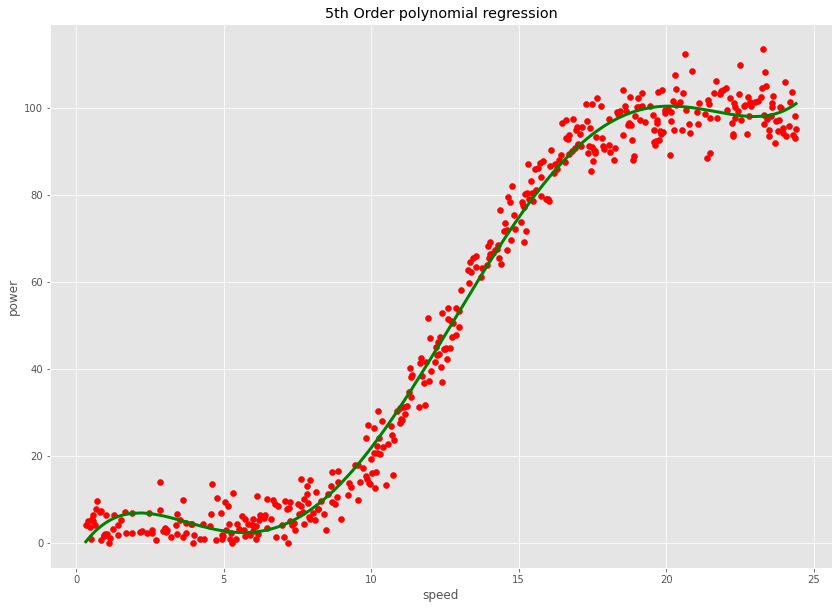

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

a = df.loc[:,"speed"]
b = df.loc[:,"power"]
X = np.array(a).reshape(-1,1)# creating arrays for use in model
y = np.array(b).reshape(-1,1)# creating arrays for use in model 

# Use only one feature
X = X [:,np.newaxis,0]

poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X)
pol_reg = linear_model.LinearRegression(fit_intercept=False)
pol_reg.fit(X_poly, y)
print('Coefficients = ', pol_reg.coef_)
y_pred = pol_reg.predict(poly_reg.fit_transform(X))
r2 = r2_score(y,y_pred)
print('Coefficient of determination: %.2f'% r2)
print('Mean squared error: %.2f'
      % mean_squared_error(y,y_pred))


# Plot outputs
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=14,10
plt.scatter(X, y, color='red')
plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='green', linewidth=3)
plt.xlabel('speed')
plt.ylabel('power')
plt.title('5th Order polynomial regression')
plt.xticks()
plt.yticks()
plt.show()
#print(len(y_pred))

The 5th Order equation here provides an excellent fit, with a co-efficient of determination (R square) value of 0.99 which means our predicted values are much more accurate than the linear model (0.90). The value of 0.99 means that our dependant variable (power) can be explained very well by the 5th order equation defined by the Sklearn model.

Although further degrees might provide slight increases in accuracy this one (5th Order) is selected for comparison to Numpy polyfit.

### Linear and Non - Regression using NumPy polyfit

In the section below I will use Numpy Polyfit to generate a fit that we can compare to the 5th order equation defined by the SKlearn package.

In [39]:
np.polyfit(a,b,1)

array([  5.61882784, -19.83768545])

In [40]:
np.polyfit(a,b,3)

array([ -0.04123923,   1.56792966, -10.62809064,  17.43400076])

In [41]:
np.polyfit(a,b,5)

array([ 3.96301722e-04, -2.52362917e-02,  5.36469779e-01, -4.10498046e+00,
        1.11555430e+01, -2.82537458e+00])

In [42]:
np.polyfit(a,b,7)

array([-5.11800944e-06,  4.48301881e-04, -1.52309418e-02,  2.50368071e-01,
       -2.04365121e+00,  8.13376790e+00, -1.38470236e+01,  1.09140715e+01])

In [43]:
np.polyfit(a,b,9)

array([ 3.07604120e-08, -3.55056364e-06,  1.67429360e-04, -4.13719172e-03,
        5.71891888e-02, -4.40990256e-01,  1.83479854e+00, -3.66512446e+00,
        2.53463163e+00,  4.08412803e+00])

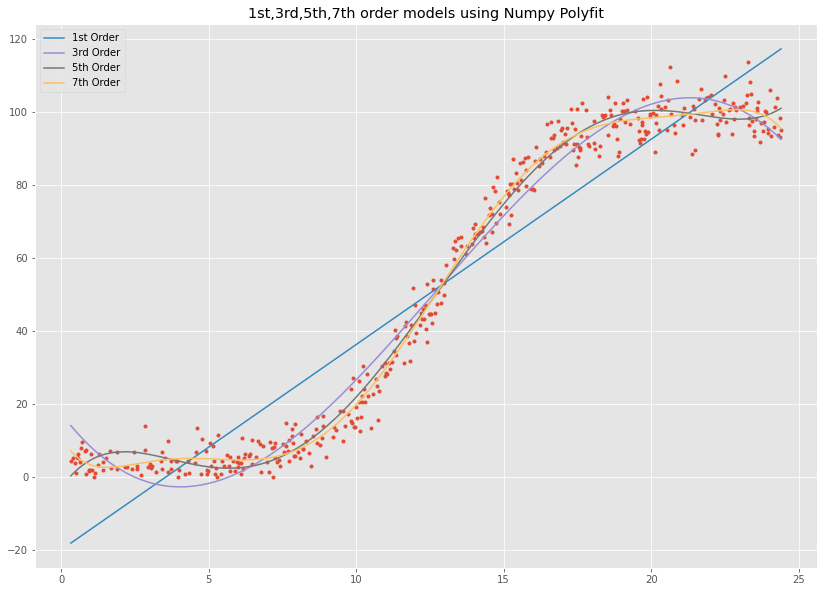

In [45]:
plt.plot(a,b,'.')
y=(5.61882784*a)-19.83768545
y3=(-0.04123923)*(a**3)+((1.56792966)*(a**2))-((10.62809064*a))+(17.43400076)
y5=(3.96301722e-04)*(a**5)+(-2.52362917e-02)*(a**4)+(5.36469779e-01)*(a**3)+(-4.10498046e+00)*(a**2)+(1.11555430e+01)*(a)+(-2.82537458e+00)
y7=(-5.11800944e-06)*(a**7)+(4.48301881e-04)*(a**6)+(-1.52309418e-02)*(a**5)+(2.50368071e-01)*(a**4)+(-2.04365121e+00)*(a**3)+(8.13376790e+00)*(a**2)+(-1.38470236e+01)*(a)+(1.09140715e+01)
plt.plot(a,y,'-',label ="1st Order")
plt.plot(a,y3,'-',label ="3rd Order")
plt.plot(a,y5,'-',label ="5th Order")
plt.plot(a,y7,'-',label ="7th Order")
plt.legend()
plt.title("1st,3rd,5th,7th order models using Numpy Polyfit")
plt.show()



### Analysis of the SKlearn and Numpy 5th order and Numpy 1st order

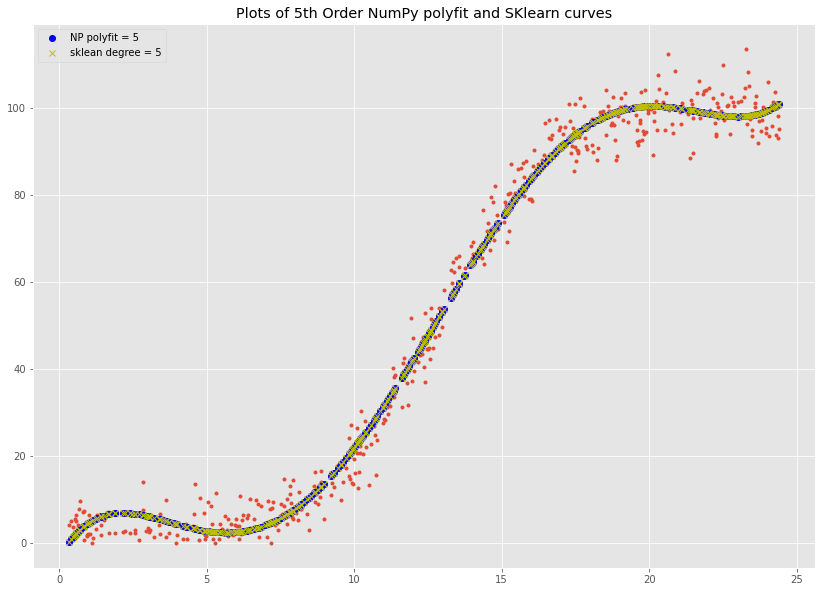

In [46]:
plt.plot(a,b,'.')
# y5 is Numpy polyfit
y5=(3.96301722e-04)*(a**5)+(-2.52362917e-02)*(a**4)+(5.36469779e-01)*(a**3)+(-4.10498046e+00)*(a**2)+(1.11555430e+01)*(a)+(-2.82537458e+00)
plt.plot(a,y5,'bo',label='NP polyfit = 5')
# y_pred is predicted values using Sklearn
plt.plot(a,y_pred,'yx',label='sklean degree = 5')
plt.legend()
plt.title("Plots of 5th Order NumPy polyfit and SKlearn curves")
plt.show()

In the above figure we can clearly see the two different methods of obtaining the co-efficients provide almost identical outputs. 

In [47]:
#Using co-efficents from 1st order SKlearn output to generate 1st order prediction data for use in table construction.
yl =(5.61882784*a)-19.83768545

In [48]:
#Creating a table of values
import pandas as pd
import math
j = np.array(a)
k = np.array(b)
l = np.array(y_pred).reshape(451,)
m = np.array(y5)
n = (l-k)
o = (m-k)
p = (n-o)
q = (n*n)
r = (o*o)
s = np.array(yl)
t = (s-k)
u =(t*t)
d={'Speed (j)':j, 'Power (k)': k,'SK linear prediction' : s,'error': t,'squared error': u,'SK 5th poly Prediction':l,'Error': n,'squared error': q,'NumPy Poly Prediction':m,'Error PF':o, 'squared error': r}
dff =pd.DataFrame(d)
dff.style

,Speed (j),Power (k),SK linear prediction,error,squared error,SK 5th poly Prediction,Error,NumPy Poly Prediction,Error PF
0,0.325000,4.331000,-18.011566,-22.342566,15.573093,0.384724,-3.946276,0.384724,-3.946276
1,0.400000,5.186000,-17.590154,-22.776154,17.407772,1.013738,-4.172262,1.013738,-4.172262
2,0.450000,3.826000,-17.309213,-21.135213,5.831165,1.411220,-2.414780,1.411220,-2.414780
3,0.501000,1.048000,-17.022653,-18.070653,0.564125,1.799083,0.751083,1.799083,0.751083
4,0.526000,5.553000,-16.882182,-22.435182,12.745979,1.982849,-3.570151,1.982849,-3.570151
5,0.551000,6.498000,-16.741711,-23.239711,18.796644,2.162490,-4.335510,2.162490,-4.335510
6,0.576000,5.241000,-16.601241,-21.842241,8.427105,2.338052,-2.902948,2.338052,-2.902948
7,0.626000,4.220000,-16.320299,-20.540299,2.380484,2.677118,-1.542882,2.677118,-1.542882
8,0.676000,7.974000,-16.039358,-24.013358,24.736649,3.000405,-4.973595,3.000405,-4.973595
9,0.701000,9.746000,-15.898887,-25.644887,43.424916,3.156242,-6.589758,3.156242,-6.589758


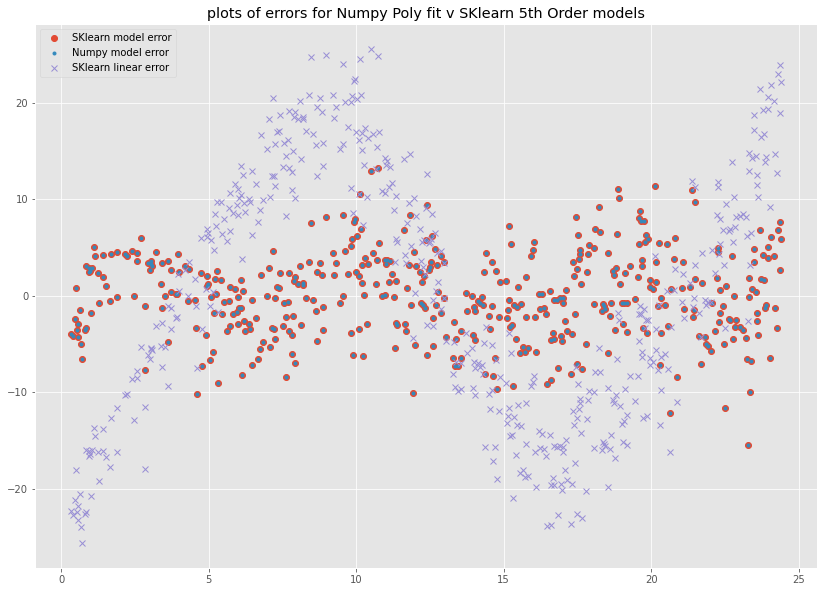

Mean squared error SKlearn 5th order 19.696
Mean squared error Numpy polyfit 19.696
Mean squared error Sklearn linear 166.325


In [50]:
import math
plt.plot(a,n,'o',label = "SKlearn model error")
plt.plot(a,o,'.',label = "Numpy model error")
plt.plot(a,t,'x',label = "SKlearn linear error")
plt.legend()
plt.title('plots of errors for Numpy Poly fit v SKlearn 5th Order models')
plt.show()

print("Mean squared error SKlearn 5th order" , (round(sum(q)/len(q),3)))
print("Mean squared error Numpy polyfit" , (round(sum(r)/len(r),3)))
print("Mean squared error Sklearn linear" , (round(sum(u)/len(u),3)))

The image above displays the errors for each model at each power value, as already seen the numpy polyfit and SK learn 5th order models are identical. The 'x's show the error in the linear model. The final linear model was taken from the values obtained in the Numpy Polyfit model, not the SKlearn model, although the SKlearn polynomaial script (degree=1) provided extremely similar values.

Numpy poly fit 1st order equation.

$${y} = {5.62}{x}-19.8$$

The 5th order co-effecients provide the same outputs. The final equation is stated below.

Final equation to 3 s.f
$${Y} = 0.000396{x}{^5}-0.0252{x}{^4}+0.536{x}{^3}-4.10{x}{^2}+11.2{x}-2.83$$

The figure shows that the error is balanced throughout the model, demonstrating that it provides a robust estimate of output (power) for (wind speed)values throughout the supplied data range.

Finally the mean square error was calculated, the values obtained demonstrate parity between the 5th order models.

Overall both methods (SKlearn and Numpy polyfit) provide near identical results, I would in future use numpy polyfit simply for ease of use.

***